In [1]:
import math
import io
import os

import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pathname = "/content/drive/My Drive/STAT 312/Laboratory Activity A/"
os.chdir(pathname)

Mounted at /content/drive


In [25]:
filename = "RuralAtlasData24.xlsx"
dtP = pd.read_excel(filename, sheet_name="Income")

In [26]:
dtP

,FIPS,State,County,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS
0,0,US,United States,69021.0,37638.0,17.046705,12.631850,5.777385,7.691715,40661636.0,16.9,12243219.0,69717.0,41393176.0,12.8,12443424.0
1,1000,AL,Alabama,54943.0,30458.0,22.261936,15.785127,7.077316,10.390582,769819.0,22.7,250327.0,53990.0,800848.0,16.3,245896.0
2,1001,AL,Autauga,62660.0,30968.0,18.673864,13.578474,6.250216,8.592895,7847.0,16.1,2199.0,66444.0,6296.0,10.7,2560.0
3,1003,AL,Baldwin,64346.0,35384.0,11.299822,9.204905,4.043401,5.503712,20598.0,16.4,8207.0,65658.0,25526.0,10.8,5449.0
4,1005,AL,Barbour,36422.0,21325.0,43.744012,26.471910,12.826966,26.729258,5890.0,35.1,1776.0,38649.0,5089.0,23.0,2283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,72145,PR,Vega Baja,21507.0,12361.0,52.765611,43.361233,22.362745,33.370684,23520.0,NaN,NaN,NaN,NaN,NaN,5180.0
3276,72147,PR,Vieques,14942.0,8834.0,85.998715,53.204280,32.271252,56.775851,4425.0,NaN,NaN,NaN,NaN,NaN,1339.0
3277,72149,PR,Villalba,20722.0,12179.0,55.402662,44.494979,28.576575,43.085946,9881.0,NaN,NaN,NaN,NaN,NaN,2456.0
3278,72151,PR,Yabucoa,17267.0,10507.0,66.122597,52.622254,26.283745,42.056583,16335.0,NaN,NaN,NaN,NaN,NaN,3646.0


In [27]:
dtP = dtP[dtP['State'] !="PR"]
dtP

,FIPS,State,County,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS
0,0,US,United States,69021.0,37638.0,17.046705,12.631850,5.777385,7.691715,40661636.0,16.9,12243219.0,69717.0,41393176.0,12.8,12443424.0
1,1000,AL,Alabama,54943.0,30458.0,22.261936,15.785127,7.077316,10.390582,769819.0,22.7,250327.0,53990.0,800848.0,16.3,245896.0
2,1001,AL,Autauga,62660.0,30968.0,18.673864,13.578474,6.250216,8.592895,7847.0,16.1,2199.0,66444.0,6296.0,10.7,2560.0
3,1003,AL,Baldwin,64346.0,35384.0,11.299822,9.204905,4.043401,5.503712,20598.0,16.4,8207.0,65658.0,25526.0,10.8,5449.0
4,1005,AL,Barbour,36422.0,21325.0,43.744012,26.471910,12.826966,26.729258,5890.0,35.1,1776.0,38649.0,5089.0,23.0,2283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,56037,WY,Sweetwater,76668.0,36233.0,13.501566,10.481391,5.646027,7.358630,4396.0,9.7,990.0,74677.0,3761.0,9.2,1466.0
3197,56039,WY,Teton,94498.0,66296.0,8.315204,7.117040,2.547332,0.652647,1654.0,5.5,223.0,102709.0,1392.0,5.9,344.0
3198,56041,WY,Uinta,75106.0,30586.0,7.466063,7.958751,3.508166,2.071006,1613.0,11.2,635.0,70162.0,1917.0,9.4,429.0
3199,56043,WY,Washakie,62271.0,31032.0,5.125149,6.571842,2.607665,3.694875,499.0,12.5,195.0,62176.0,773.0,10.2,86.0


In [28]:
dtP.columns

Index(['FIPS', 'State', 'County', 'Median_HH_Inc_ACS', 'PerCapitaInc',
       'Poverty_Rate_0_17_ACS', 'Poverty_Rate_ACS', 'Deep_Pov_All',
       'Deep_Pov_Children', 'NumAll_inPOV_ACS', 'PCTPOV017', 'POV017',
       'MedHHInc', 'POVALL', 'PCTPOVALL', 'Num_inPOV_0_17_ACS'],
      dtype='object')

In [29]:
states = dtP.loc[ dtP["FIPS"]/1000==round(dtP["FIPS"]/1000) ]
states = states[states['FIPS']!=0]
states

,FIPS,State,County,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS
1,1000,AL,Alabama,54943.0,30458.0,22.261936,15.785127,7.077316,10.390582,769819.0,22.7,250327.0,53990.0,800848.0,16.3,245896.0
69,2000,AK,Alaska,80287.0,39236.0,13.145165,10.432132,4.998985,5.908146,75016.0,13.5,23760.0,78437.0,77736.0,10.8,23533.0
105,4000,AZ,Arizona,65913.0,34644.0,18.771055,13.498023,6.320044,8.195132,934911.0,17.8,281696.0,68967.0,919680.0,12.9,297659.0
121,5000,AR,Arkansas,52123.0,29210.0,21.891699,16.010788,6.657135,9.283019,468113.0,21.8,150353.0,52577.0,471195.0,16.0,151704.0
197,6000,CA,California,84097.0,41276.0,16.155672,12.250670,5.642557,6.908711,4741175.0,15.8,1362903.0,84831.0,4742405.0,12.3,1429686.0
256,8000,CO,Colorado,80184.0,42807.0,11.387980,9.561742,4.674581,5.273508,535976.0,11.8,144163.0,82228.0,554126.0,9.7,141821.0
321,9000,CT,Connecticut,83572.0,47869.0,13.302459,10.031584,4.672297,6.232082,351476.0,12.9,93263.0,83628.0,355861.0,10.1,97861.0
330,10000,DE,Delaware,72724.0,38917.0,17.328612,11.435095,5.275837,6.893920,109274.0,16.2,33302.0,71636.0,113026.0,11.5,35188.0
334,11000,DC,District of Columbia,93547.0,63793.0,22.772735,15.441255,8.773392,13.220705,100618.0,25.5,31194.0,91072.0,107307.0,16.8,28051.0
336,12000,FL,Florida,61777.0,35216.0,18.206850,13.114408,5.860742,7.808638,2744612.0,18.4,774679.0,63054.0,2830813.0,13.2,763527.0


In [30]:
states = states[states['State']!="DC"]
states

,FIPS,State,County,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS
1,1000,AL,Alabama,54943.0,30458.0,22.261936,15.785127,7.077316,10.390582,769819.0,22.7,250327.0,53990.0,800848.0,16.3,245896.0
69,2000,AK,Alaska,80287.0,39236.0,13.145165,10.432132,4.998985,5.908146,75016.0,13.5,23760.0,78437.0,77736.0,10.8,23533.0
105,4000,AZ,Arizona,65913.0,34644.0,18.771055,13.498023,6.320044,8.195132,934911.0,17.8,281696.0,68967.0,919680.0,12.9,297659.0
121,5000,AR,Arkansas,52123.0,29210.0,21.891699,16.010788,6.657135,9.283019,468113.0,21.8,150353.0,52577.0,471195.0,16.0,151704.0
197,6000,CA,California,84097.0,41276.0,16.155672,12.250670,5.642557,6.908711,4741175.0,15.8,1362903.0,84831.0,4742405.0,12.3,1429686.0
256,8000,CO,Colorado,80184.0,42807.0,11.387980,9.561742,4.674581,5.273508,535976.0,11.8,144163.0,82228.0,554126.0,9.7,141821.0
321,9000,CT,Connecticut,83572.0,47869.0,13.302459,10.031584,4.672297,6.232082,351476.0,12.9,93263.0,83628.0,355861.0,10.1,97861.0
330,10000,DE,Delaware,72724.0,38917.0,17.328612,11.435095,5.275837,6.893920,109274.0,16.2,33302.0,71636.0,113026.0,11.5,35188.0
336,12000,FL,Florida,61777.0,35216.0,18.206850,13.114408,5.860742,7.808638,2744612.0,18.4,774679.0,63054.0,2830813.0,13.2,763527.0
404,13000,GA,Georgia,65030.0,34516.0,19.571297,13.916825,6.324048,8.586697,1441351.0,20.5,508616.0,66507.0,1493837.0,14.2,488233.0


In [31]:
counties = dtP.loc[ dtP["FIPS"]/1000!=round(dtP["FIPS"]/1000) ]
counties

,FIPS,State,County,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS
2,1001,AL,Autauga,62660.0,30968.0,18.673864,13.578474,6.250216,8.592895,7847.0,16.1,2199.0,66444.0,6296.0,10.7,2560.0
3,1003,AL,Baldwin,64346.0,35384.0,11.299822,9.204905,4.043401,5.503712,20598.0,16.4,8207.0,65658.0,25526.0,10.8,5449.0
4,1005,AL,Barbour,36422.0,21325.0,43.744012,26.471910,12.826966,26.729258,5890.0,35.1,1776.0,38649.0,5089.0,23.0,2283.0
5,1007,AL,Bibb,54277.0,24787.0,28.042907,16.942857,9.076190,17.513135,3558.0,29.0,1275.0,48454.0,4204.0,20.6,1281.0
6,1009,AL,Blount,52830.0,27309.0,17.281668,13.236630,5.291223,6.344746,7720.0,16.7,2236.0,56894.0,6992.0,12.0,2337.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,56037,WY,Sweetwater,76668.0,36233.0,13.501566,10.481391,5.646027,7.358630,4396.0,9.7,990.0,74677.0,3761.0,9.2,1466.0
3197,56039,WY,Teton,94498.0,66296.0,8.315204,7.117040,2.547332,0.652647,1654.0,5.5,223.0,102709.0,1392.0,5.9,344.0
3198,56041,WY,Uinta,75106.0,30586.0,7.466063,7.958751,3.508166,2.071006,1613.0,11.2,635.0,70162.0,1917.0,9.4,429.0
3199,56043,WY,Washakie,62271.0,31032.0,5.125149,6.571842,2.607665,3.694875,499.0,12.5,195.0,62176.0,773.0,10.2,86.0


In [32]:
pcr2 = counties['Deep_Pov_All'].dropna()
ss.describe(pcr2)

DescribeResult(nobs=3143, minmax=(0.0, 36.8837711407), mean=6.304825456730384, variance=10.789359157857495, skewness=2.204393939513167, kurtosis=10.665726722398855)

In [33]:
summary = counties['Deep_Pov_All'].describe()
summary

,Deep_Pov_All
count,3143.000000
mean,6.304825
std,3.284716
min,0.000000
25%,4.181686
50%,5.676209
75%,7.599691
max,36.883771


(array([ 540., 1748.,  606.,  174.,   54.,    9.,    4.,    4.,    2.,
           2.]),
 array([ 0.        ,  3.68837711,  7.37675423, 11.06513134, 14.75350846,
        18.44188557, 22.13026268, 25.8186398 , 29.50701691, 33.19539403,
        36.88377114]),
 <BarContainer object of 10 artists>)

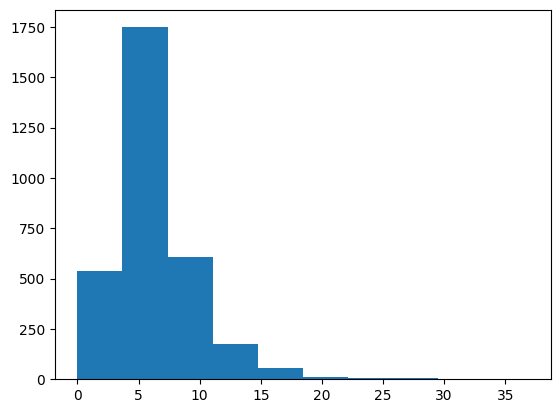

In [47]:
plt.hist(counties['Deep_Pov_All'])

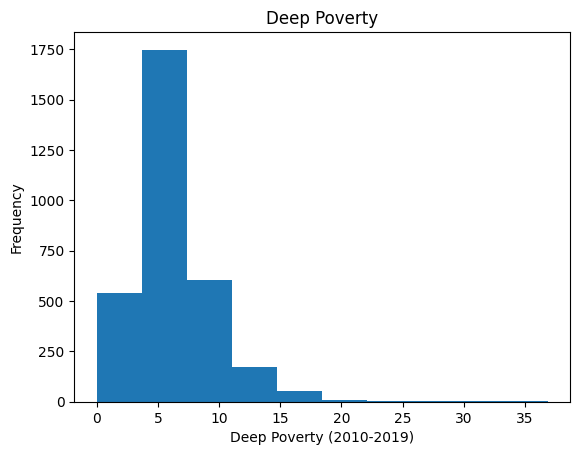

In [48]:
plt.hist(counties['Deep_Pov_All'])
plt.xlabel('Deep Poverty (2010-2019)')
plt.ylabel('Frequency')
plt.title('Deep Poverty');

It is rightly skewed and the distribution is not symmetric. There are very less counties that have a high deep povery rate

In [39]:
counties_nona = counties.dropna()
ss.pearsonr(counties_nona.Deep_Pov_Children,counties_nona.Deep_Pov_All)

PearsonRResult(statistic=0.8527298544847137, pvalue=0.0)

Text(0, 0.5, 'Deep Poverty')

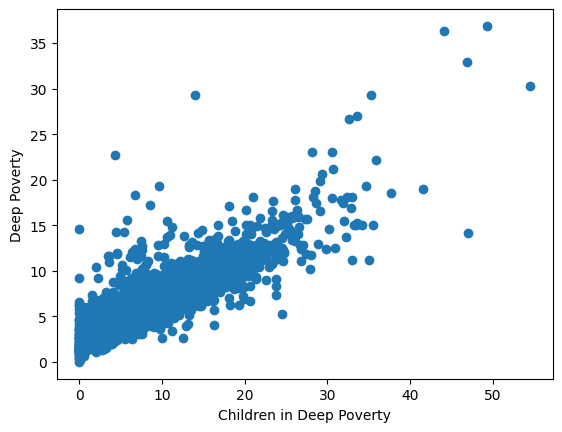

In [49]:
plt.scatter(counties_nona.Deep_Pov_Children,counties_nona.Deep_Pov_All)

plt.xlabel('Children in Deep Poverty')
plt.ylabel('Deep Poverty')

In [50]:
ss.linregress(counties_nona.Deep_Pov_Children,counties_nona.Deep_Pov_All)

LinregressResult(slope=0.4681663318350036, intercept=2.2030710617414275, rvalue=0.8527298544847135, pvalue=0.0, stderr=0.005118662085909697, intercept_stderr=0.05426167417016143)

In [51]:
mod = ss.linregress(counties_nona.Deep_Pov_Children,counties_nona.Deep_Pov_All)
mod

LinregressResult(slope=0.4681663318350036, intercept=2.2030710617414275, rvalue=0.8527298544847135, pvalue=0.0, stderr=0.005118662085909697, intercept_stderr=0.05426167417016143)

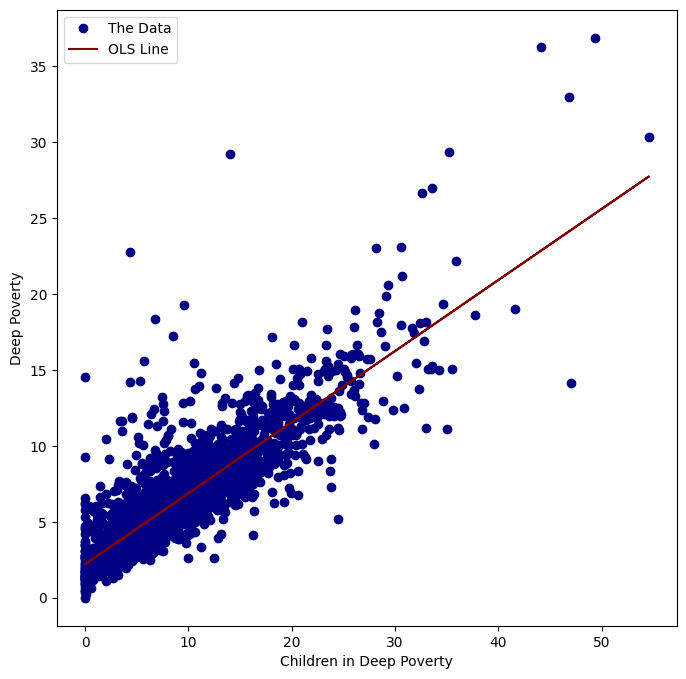

In [52]:
plt.figure(figsize=(8, 8))

plt.plot(counties_nona.Deep_Pov_Children,counties_nona.Deep_Pov_All, 'o', label='The Data', c='#000080')

plt.plot(counties_nona.Deep_Pov_Children, mod.intercept + mod.slope*counties_nona.Deep_Pov_Children, c='#800000', label='OLS Line')

plt.xlabel('Children in Deep Poverty')
plt.ylabel('Deep Poverty')

plt.legend();

In [53]:
slope = 0.4681663318350036
intercept = 2.2030710617414275

children_deep_pov = 10
residents_deep_pov = intercept + slope * children_deep_pov

residents_deep_pov

6.884734380091464